In [117]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.under_sampling import OneSidedSelection
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split

Melakukan _exploratory data analysis_ yang meliputi:
<br>1. Pemeriksaan _Missing value_.</br>
<br>2. Pemeriksaan Korelasi.</br>
<br>3. Pemeriksaan _Imbalanced Class_.</br>

In [2]:
data = pd.read_csv('car_insurance_claim_edit.csv')

In [8]:
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16-Mar-39,60.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,132761049,0,21-Jan-56,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,921317019,0,18-Nov-51,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,727598473,0,05-Mar-64,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,450221861,0,05-Jun-48,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13-Aug-54,45.0,2,9.0,164669.0,No,386273.0,Yes,...,Minivan,no,0,0,No,2,0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17-Jun-53,46.0,0,9.0,107204.0,No,332591.0,Yes,...,Panel Truck,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18-Jun-51,48.0,0,15.0,39837.0,No,170611.0,Yes,...,z_SUV,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12-Dec-48,50.0,0,7.0,43445.0,No,149248.0,Yes,...,Minivan,no,0,0,No,0,0,11.0,0,Highly Urban/ Urban


Perhitungan _missing value_. Jumlah observasi yang mengandung _missing value_ sama dengan **3004**.

In [22]:
print(data.isna().sum())
print("Jumlah Missing Value: ", data.isna().sum().sum())

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64
Jumlah Missing Value:  3004


In [19]:
a.sum()

3004

Mengetahui berapa jumlah kelas yang ada.

In [24]:
data['CLAIM_FLAG'].nunique()

2

Hapus kolom yang dianggap tidak perlu.

In [26]:
data.drop(['ID','BIRTH','AGE','YOJ','INCOME','HOME_VAL','OCCUPATION','CAR_AGE','URBANICITY'],axis=1,inplace=True)

In [27]:
data

,KIDSDRIV,HOMEKIDS,PARENT1,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CLAIM_FLAG,URBANICITY
0,0,0,No,z_No,M,PhD,14,Private,14230,11,Minivan,yes,4461,2,No,3,0,0,Highly Urban/ Urban
1,0,0,No,z_No,M,z_High School,22,Commercial,14940,1,Minivan,yes,0,0,No,0,0,0,Highly Urban/ Urban
2,0,0,No,z_No,M,Bachelors,26,Private,21970,1,Van,yes,0,0,No,2,0,0,Highly Urban/ Urban
3,0,1,No,Yes,z_F,z_High School,5,Private,4010,4,z_SUV,no,38690,2,No,3,0,0,Highly Urban/ Urban
4,0,0,No,Yes,M,<High School,32,Private,15440,7,Minivan,yes,0,0,No,0,0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,2,No,Yes,M,PhD,21,Private,13270,15,Minivan,no,0,0,No,2,0,0,Highly Urban/ Urban
10298,0,0,No,Yes,M,Masters,36,Commercial,24490,6,Panel Truck,no,0,0,No,0,0,0,Highly Urban/ Urban
10299,0,0,No,Yes,z_F,<High School,12,Private,13820,7,z_SUV,no,0,0,No,0,0,0,Highly Urban/ Urban
10300,0,0,No,Yes,z_F,Bachelors,36,Private,22550,6,Minivan,no,0,0,No,0,0,0,Highly Urban/ Urban


Menghitung korelasi antar kolom.

In [39]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

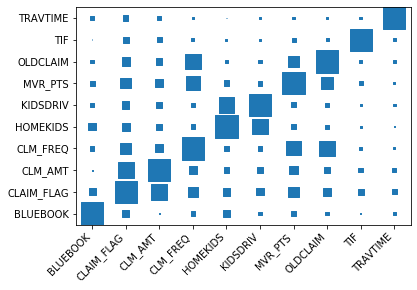

In [41]:
corr = data[data.columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [43]:
data.drop(['BLUEBOOK','HOMEKIDS','KIDSDRIV','OLDCLAIM','TIF','TRAVTIME'],axis=1, inplace=True)

In [44]:
data

,PARENT1,MSTATUS,GENDER,EDUCATION,CAR_USE,CAR_TYPE,RED_CAR,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CLAIM_FLAG,URBANICITY
0,No,z_No,M,PhD,Private,Minivan,yes,2,No,3,0,0,Highly Urban/ Urban
1,No,z_No,M,z_High School,Commercial,Minivan,yes,0,No,0,0,0,Highly Urban/ Urban
2,No,z_No,M,Bachelors,Private,Van,yes,0,No,2,0,0,Highly Urban/ Urban
3,No,Yes,z_F,z_High School,Private,z_SUV,no,2,No,3,0,0,Highly Urban/ Urban
4,No,Yes,M,<High School,Private,Minivan,yes,0,No,0,0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,No,Yes,M,PhD,Private,Minivan,no,0,No,2,0,0,Highly Urban/ Urban
10298,No,Yes,M,Masters,Commercial,Panel Truck,no,0,No,0,0,0,Highly Urban/ Urban
10299,No,Yes,z_F,<High School,Private,z_SUV,no,0,No,0,0,0,Highly Urban/ Urban
10300,No,Yes,z_F,Bachelors,Private,Minivan,no,0,No,0,0,0,Highly Urban/ Urban


In [48]:
data.drop(['PARENT1','MSTATUS','GENDER','EDUCATION','CAR_USE','CAR_TYPE','RED_CAR'],axis=1,inplace=True)

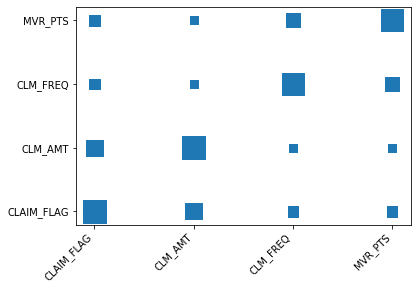

In [49]:
corr = data[data.columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

Memeriksa jumlah kelas. Ternyata dijumpai kasus _imbalanced class_ dimana jumlah kelas 0 sama dengan __7556__ dan kelas 1 sama dengan __2746__.

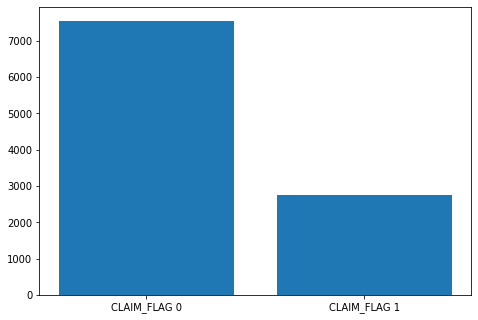

In [64]:
a = data.CLAIM_FLAG.value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['CLAIM_FLAG 0','CLAIM_FLAG 1']
students = [a[0],a[1]]
ax.bar(langs,students)
plt.show()

In [80]:
mapping = {'No': 0, 'Yes': 1}
data.replace({'REVOKED': mapping},inplace=True)

In [111]:
X = data.drop(['CLAIM_FLAG'],axis=1)
y = data['CLAIM_FLAG']

In [112]:
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=2700)
# transform the dataset
X, y = undersample.fit_resample(X, y)

1    2746
0    2700
Name: CLAIM_FLAG, dtype: int64

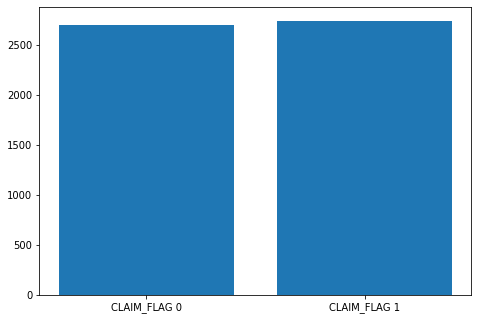

In [114]:
a = y.value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['CLAIM_FLAG 0','CLAIM_FLAG 1']
students = [a[0],a[1]]
ax.bar(langs,students)
plt.show()

Berdasarkan grafik diatas, kelas sudah dalam keadaan _balanced_. Proses selanjutnya adalah melakukan klasifikasi.
<br>_Classifier_ yang dipilih adalah SVM ( _natural binary classifier_ )</br>

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       909
           1       1.00      0.99      0.99       889

    accuracy                           0.99      1798
   macro avg       1.00      0.99      0.99      1798
weighted avg       1.00      0.99      0.99      1798

